<a href="https://colab.research.google.com/github/hoangson281205/ueh-ktlt-eco/blob/main/Copy_of_Lib2(2_1_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nhiệm vụ 1 – Xây dựng cây quyết định (Decision Tree)

In [ ]:
# Giữ lại các biến quan trọng cho mô hình
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']
df = df[features]

# Xóa các hàng có giá trị thiếu
df = df.dropna()

# Chuyển đổi biến phân loại sang số
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

# Tách X (đặc trưng) và y (nhãn)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Chia dữ liệu train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

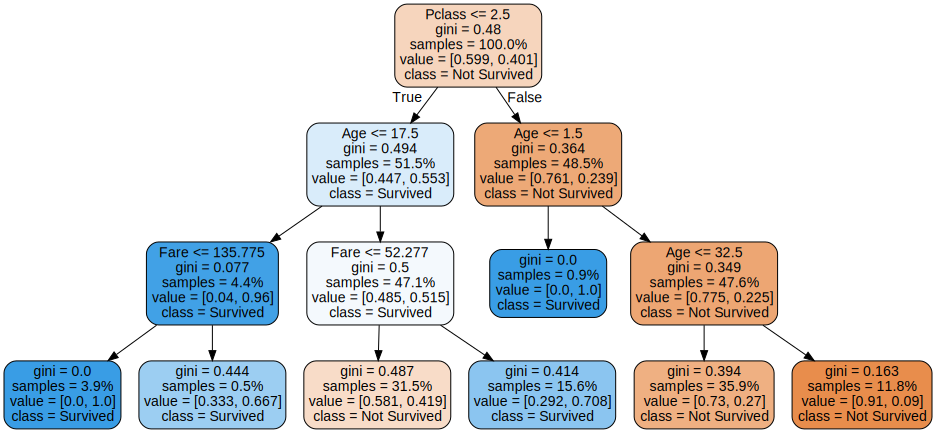

In [ ]:
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=['Not Survived','Survived'],
    filled=True,
    rounded=True,
    proportion=True
)
graph = graphviz.Source(dot_data)
graph        # hiển thị trực tiếp trên Colab


In [ ]:
y_pred = dt.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 0.6853146853146853

📊 Confusion Matrix:
 [[72 11]
 [34 26]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76        83
           1       0.70      0.43      0.54        60

    accuracy                           0.69       143
   macro avg       0.69      0.65      0.65       143
weighted avg       0.69      0.69      0.67       143



Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau  

In [ ]:
# === BƯỚC 1: Import thư viện cần thiết ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import roc_auc_score, accuracy_score

# Hiển thị đồ thị trong Colab
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

print("Libraries imported.")


Libraries imported.


In [ ]:
# === BƯỚC 2: Đảm bảo dữ liệu đã được nạp và tiền xử lý ===
# Nếu bạn đã chạy Nhiệm vụ 1 rồi thì biến X_train sẽ tồn tại và ô này sẽ bỏ qua phần nạp dữ liệu.
try:
    X_train  # kiểm tra tồn tại
    print("Found existing X_train, X_test, y_train, y_test — bỏ qua bước nạp lại.")
except NameError:
    from google.colab import files
    print("X_train không tồn tại. Nếu bạn chưa upload train.csv, Colab sẽ yêu cầu upload file.")
    uploaded = files.upload()   # chọn train.csv từ máy
    # đọc file (giả sử tên là train.csv)
    df = pd.read_csv("train.csv")
    # Chọn các cột giống hướng dẫn lab
    features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']
    df = df[features]
    # Loại bỏ hàng có giá trị thiếu
    df = df.dropna()
    # Map categorical -> numeric
    df['Sex'] = df['Sex'].map({'male':0, 'female':1})
    df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})
    # Tách X,y và chia train/test
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
    print("Dữ liệu đã nạp và tiền xử lý xong. Kích thước:")
    print("X_train:", X_train.shape, "X_test:", X_test.shape)


Found existing X_train, X_test, y_train, y_test — bỏ qua bước nạp lại.


In [ ]:
# === BƯỚC 3: Thiết lập GridSearchCV cho DecisionTree (tối ưu max_depth) ===
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 8, 10, 12]}

dt_model = tree.DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='roc_auc',        # giống lab gốc: dùng ROC AUC
    cv=4,                     # 4-fold CV như bài mẫu
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch trên X_train, y_train
grid.fit(X_train, y_train)

print("GridSearch hoàn tất.")
print("Best params:", grid.best_params_)
print("Best CV ROC AUC (mean):", grid.best_score_)


Fitting 4 folds for each of 9 candidates, totalling 36 fits
GridSearch hoàn tất.
Best params: {'max_depth': 4}
Best CV ROC AUC (mean): 0.7311775505795954


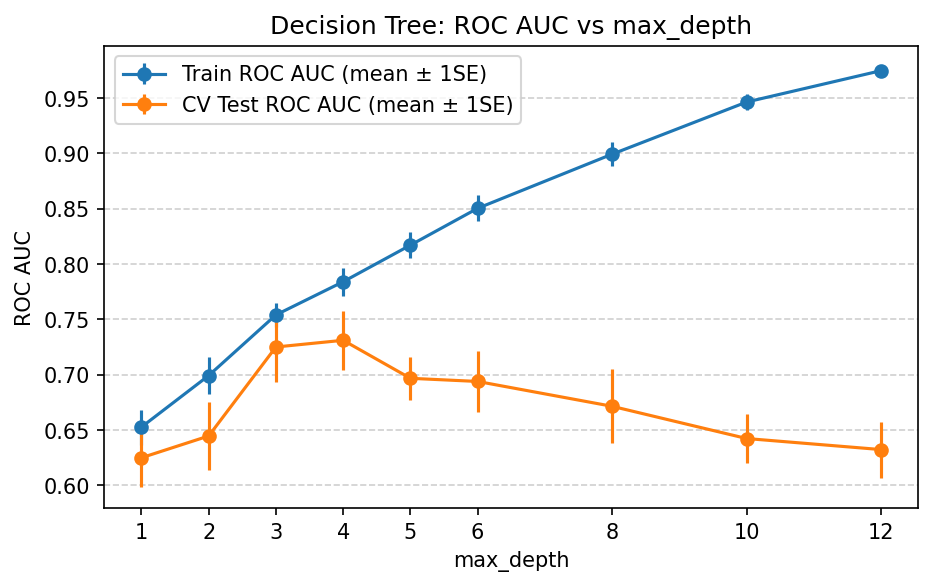

In [ ]:
# === BƯỚC 4: Trích cv_results_ và vẽ biểu đồ mean ± 1 SE ===
cv_results_df = pd.DataFrame(grid.cv_results_)

# Chuyển param_max_depth sang int để vẽ
depths = cv_results_df['param_max_depth'].astype(int)

mean_train = cv_results_df['mean_train_score']
std_train  = cv_results_df['std_train_score']
mean_test  = cv_results_df['mean_test_score']
std_test   = cv_results_df['std_test_score']

n_splits = 4  # bằng cv dùng khi chạy GridSearchCV

plt.figure(figsize=(7,4))
plt.errorbar(depths, mean_train, yerr=std_train/np.sqrt(n_splits),
             label='Train ROC AUC (mean ± 1SE)', marker='o')
plt.errorbar(depths, mean_test, yerr=std_test/np.sqrt(n_splits),
             label='CV Test ROC AUC (mean ± 1SE)', marker='o')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Decision Tree: ROC AUC vs max_depth')
plt.xticks(depths)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [ ]:
# === BƯỚC 5: Đánh giá best_estimator_ trên X_test ===
best_dt = grid.best_estimator_

# Dự báo probability để tính ROC AUC
y_test_proba = best_dt.predict_proba(X_test)[:, 1]
test_rocauc = roc_auc_score(y_test, y_test_proba)

# Dự đoán nhãn theo ngưỡng 0.5 để tính accuracy
y_test_pred = (y_test_proba >= 0.5).astype(int)
test_acc = accuracy_score(y_test, y_test_pred)

print("Đánh giá trên tập test:")
print(f"Test ROC AUC = {test_rocauc:.4f}")
print(f"Test Accuracy = {test_acc:.4f}")

# Lưu kết quả GridSearch (tuỳ chọn)
cv_results_df.to_csv('dt_gridsearch_results.csv', index=False)
print("Kết quả cv đã lưu thành 'dt_gridsearch_results.csv' trong workspace.")


Đánh giá trên tập test:
Test ROC AUC = 0.7268
Test Accuracy = 0.6713
Kết quả cv đã lưu thành 'dt_gridsearch_results.csv' trong workspace.


Nhiệm vụ 3: Xây dựng rừng cây (random forest)

In [ ]:
# === BƯỚC 1: Import thư viện cần thiết ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score

%matplotlib inline
plt.rcParams['figure.dpi'] = 150

print("Libraries imported.")


Libraries imported.


In [ ]:
# === BƯỚC 2: Kiểm tra xem X_train đã có chưa, nếu chưa thì nạp lại train.csv ===
try:
    X_train
    print("✅ Dữ liệu Titanic sẵn sàng.")
except NameError:
    from google.colab import files
    print("⚠️ Cần upload file train.csv")
    uploaded = files.upload()
    df = pd.read_csv("train.csv")
    features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']
    df = df[features].dropna()
    df['Sex'] = df['Sex'].map({'male':0,'female':1})
    df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)
    print("✅ Dữ liệu đã được nạp lại.")


✅ Dữ liệu Titanic sẵn sàng.


In [ ]:
# === BƯỚC 3: Thiết lập mô hình Random Forest và tìm tham số n_estimators tối ưu ===
rf = RandomForestClassifier(
    criterion='gini',
    max_depth=6,
    random_state=42
)

# Tập giá trị n_estimators cần thử (10 → 100)
rf_params = {'n_estimators': list(range(10, 110, 10))}

cv_rf = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring='roc_auc',
    cv=4,
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

cv_rf.fit(X_train, y_train)
print("✅ GridSearchCV hoàn tất.")
print("Best params:", cv_rf.best_params_)
print("Best CV ROC AUC:", cv_rf.best_score_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
✅ GridSearchCV hoàn tất.
Best params: {'n_estimators': 100}
Best CV ROC AUC: 0.7392411860705115


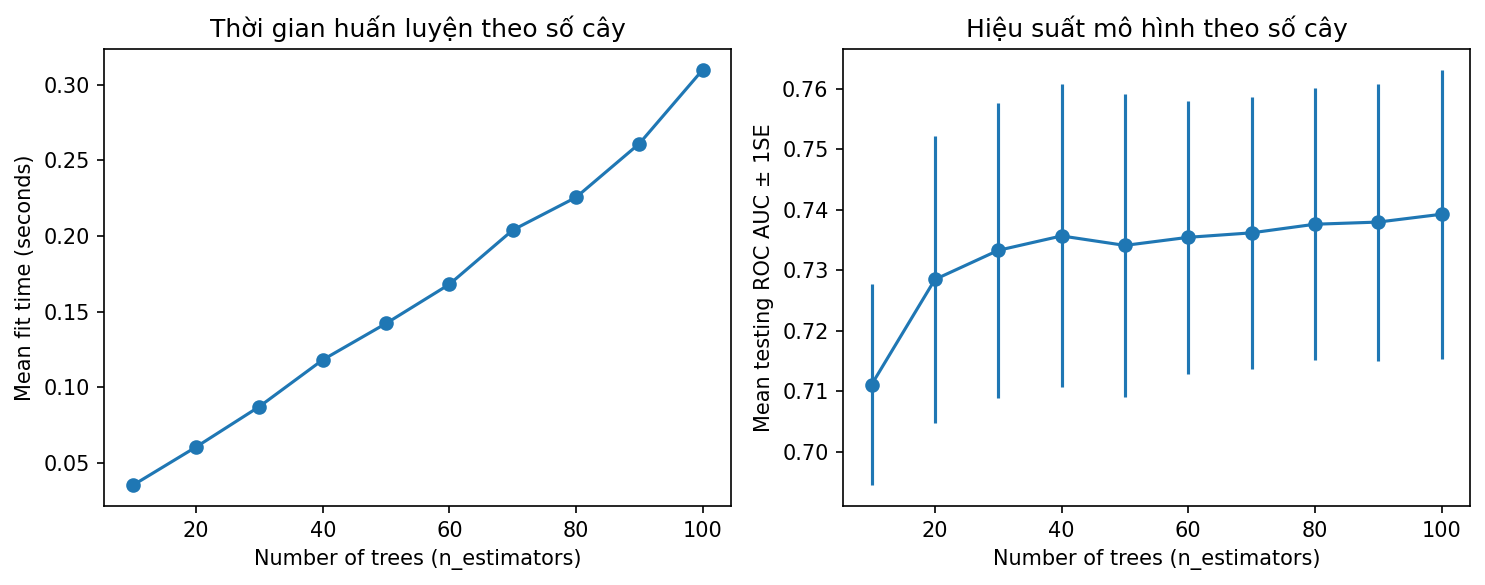

In [ ]:
# === BƯỚC 4: Trích kết quả cv_results_ và vẽ biểu đồ ===
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Biểu đồ thời gian huấn luyện
axs[0].plot(cv_rf_results_df['param_n_estimators'], cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees (n_estimators)')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[0].set_title('Thời gian huấn luyện theo số cây')

# Biểu đồ ROC AUC
axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score']/np.sqrt(4),
                fmt='-o')
axs[1].set_xlabel('Number of trees (n_estimators)')
axs[1].set_ylabel('Mean testing ROC AUC ± 1SE')
axs[1].set_title('Hiệu suất mô hình theo số cây')

plt.tight_layout()
plt.show()


Best parameters: {'n_estimators': 100}


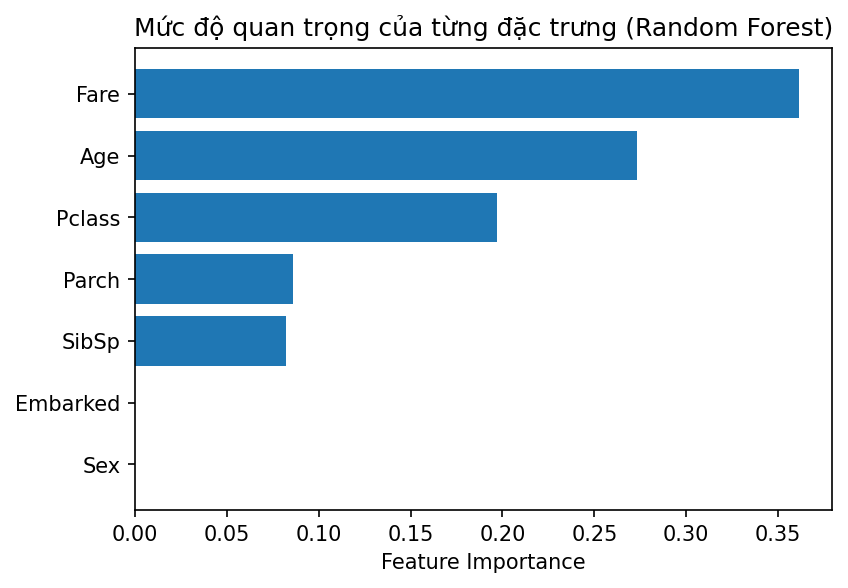

In [ ]:
# === BƯỚC 5: Xem tham số tối ưu và biểu đồ Feature Importance ===
print("Best parameters:", cv_rf.best_params_)

feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cv_rf.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(6,4))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Mức độ quan trọng của từng đặc trưng (Random Forest)')
plt.show()


In [ ]:
# === BƯỚC 6: Đánh giá mô hình tốt nhất trên test set ===
best_rf = cv_rf.best_estimator_

y_test_proba = best_rf.predict_proba(X_test)[:,1]
y_test_pred = best_rf.predict(X_test)

rocauc = roc_auc_score(y_test, y_test_proba)
acc = accuracy_score(y_test, y_test_pred)

print(f"🎯 Test ROC AUC: {rocauc:.4f}")
print(f"🎯 Test Accuracy: {acc:.4f}")


🎯 Test ROC AUC: 0.7873
🎯 Test Accuracy: 0.7133
